In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-05 17:40:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-05 17:40:06 (108 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words/2, kernel_regularizer=L2(0.01), activation='relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              483105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,803,471
Trainable params: 6,803,471
Non-trainable params: 0
____________________________________________

In [12]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 13ms/step - loss: 6.9995 - accuracy: 0.0231
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5119 - accuracy: 0.0233
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.4127 - accuracy: 0.0271
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2926 - accuracy: 0.0316
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1778 - accuracy: 0.0369
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0701 - accuracy: 0.0403
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 5.9661 - accuracy: 0.0437
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 5.8389 - accuracy: 0.0497
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 5.7029 - accuracy: 0.0579
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 5.572

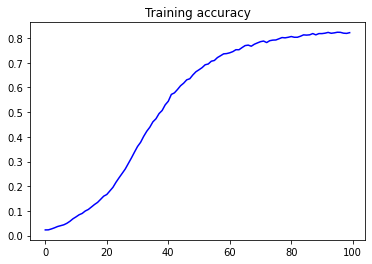

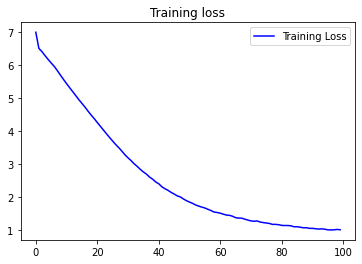

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope sail in my five control crime day days respect hell on growing brow decay light clearer mad commits mad mad show'st show'st dyed worse dyed dyed dyed behind me clears behind love's chest lie may but me doth none alive me done there confounds me fair ill past disgrace ' doth come grow doth green me light held appear taken taken crime clearer light young to crave crave cross rare rare ' lived and blot my love's wrong shall spend impute near eye sounds sounds go or rain check rolling thee they confounds him 'tis her lips to none '
